In [ ]:
на каждого говорящего:
    количество реплик - просто считаем интервалы первого слоя
    количество переключений кода внутри - совпадают ли границы интервала с пойнт-тиром
    количество пК вне -  то же самое
    словарь частотных слов - до и после

In [2]:
from praatio import tgio
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import collections

def cs_number(cs_num):
    input_filename = 'all_1.TextGrid'
    tg = tgio.openTextgrid(input_filename)
    cs = tg.tierDict[tg.tierNameList[cs_num]]
    a = [entry[1] for entry in cs.entryList]
    counter = collections.Counter(a)
    X = [item for item in counter]
    Y = [c[1] for c in counter.items()]
    plt.title('Instances of Intersententional Code Switches per corpus')
    colors = sns.color_palette('Accent')
    plt.bar(X, Y, color=colors)
    for a, b in enumerate(Y):
        plt.text(a, b + 1, str(b))
    plt.savefig('inter.png')
#     print(a)

cs_number(20)
    

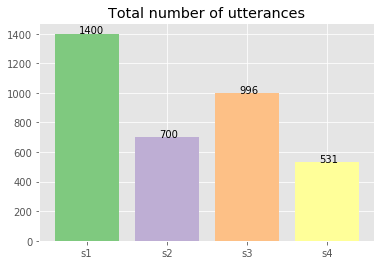

In [9]:
# number of utterances per speaker

from praatio import tgio
from functools import wraps
import re
import os
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

style.use('ggplot') 
# filenames = ['game_1-885s.TextGrid', 'game_885-1785s.TextGrid', 'game_1785-2605s.TextGrid', 'game_2605-3500s.TextGrid', 'game_3500-4400.TextGrid', 'game_4400-5300.TextGrid']

def mi_len(speaker_n):
    input_filename = 'all_1.TextGrid'
    tg = tgio.openTextgrid(input_filename)
    synt = tg.tierDict[tg.tierNameList[speaker_n]]
    a = len(synt.entryList)
    return a

s1 = mi_len(0)
s2 = mi_len(5)
s3 = mi_len(10)
s4 = mi_len(15)

X = ['s1', 's2', 's3', 's4']
Y = [s1, s2, s3, s4]

colors = sns.color_palette('Accent', max(Y))
for a, b in enumerate(Y):
    plt.text(a - 0.1, b + 1, str(b))
plt.title('Total number of utterances')
plt.bar(X, Y, color=colors)
plt.savefig('speakers.png')
plt.show()

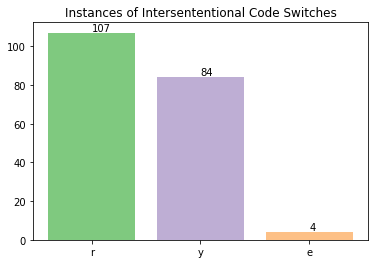

In [3]:
# number of intra-CS per speaker
import collections

def CS_counter(s_num, CS_number, picname):
    is_list = []
    f_list = []
    tg = tgio.openTextgrid('all_1.TextGrid')
    
    rus = tg.tierDict[tg.tierNameList[s_num]]
    switches = [entry[0] for entry in rus.entryList]        
    ykt = tg.tierDict[tg.tierNameList[s_num + 1]]
    switches.extend([entry[0] for entry in ykt.entryList])    
    cs = tg.tierDict[tg.tierNameList[CS_number]]
    cs_list = [entry[0] for entry in cs.entryList]
      
    for entry in switches:
        if entry in cs_list:
            is_list.append(entry)               
    for entry in is_list:
        f_list.extend([label for point, label in cs.entryList if entry == point])
    counter = collections.Counter(f_list)
#     return counter


    X = [item for item in counter]
    Y = [c[1] for c in counter.items()]
    plt.title('Instances of Intersententional Code Switches')
    colors = sns.color_palette('Accent')
    plt.bar(X, Y, color=colors)
    for a, b in enumerate(Y):
        plt.text(a, b + 1, str(b))
    plt.savefig(picname + '.png')  

CS_counter(1, 20, 's1_inter_0')

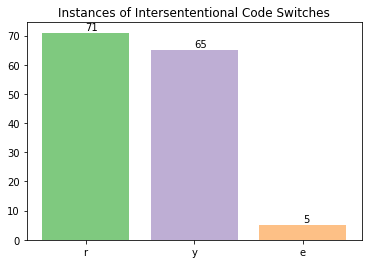

In [4]:
CS_counter(6, 20, 's2_inter_0')


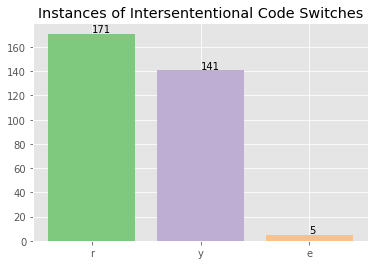

In [18]:
CS_counter(11, 20, 's3_inter_0')

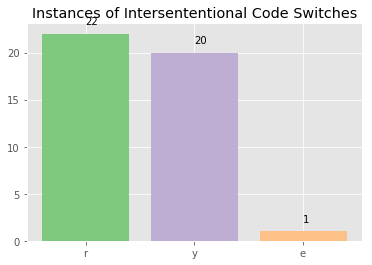

In [19]:
CS_counter(16, 20, 's4_inter_0')